In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D,BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
import collections

In [ ]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

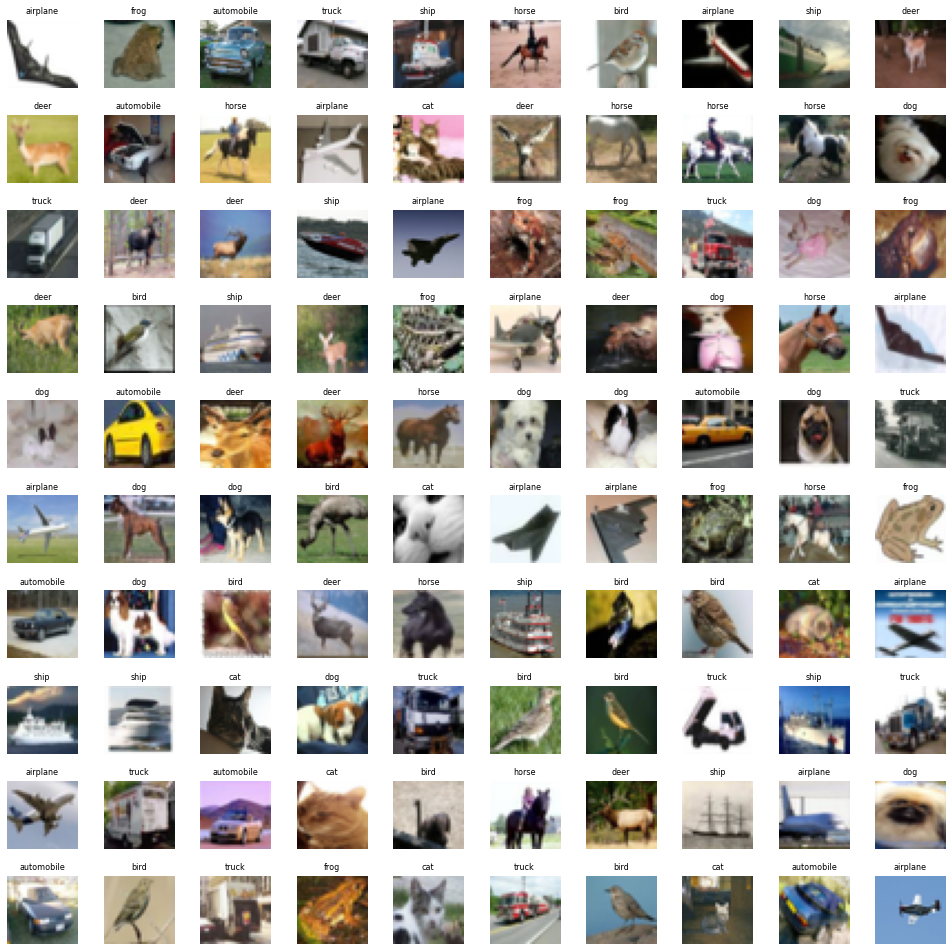

In [ ]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() 
n_train = len(y_train) 

for i in np.arange(0, W_grid * L_grid):
    index = np.random.randint(0, n_train) 
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [ ]:
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [ ]:
#Normalize the data
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train=x_train/255
x_test=x_test/255

In [ ]:
# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU => DROPOUT
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
# a softmax classifier
model.add(Dense(10))
model.add(Activation('softmax'))


In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_42 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_43 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 15, 15, 64)        18496     
_________________________________________________________________
activation_44 (Activation)   (None, 15, 15, 64)       

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam()

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist=model.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 1.6941 - accuracy: 0.3803 - val_loss: 1.1684 - val_accuracy: 0.5888
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 1.0782 - accuracy: 0.6200 - val_loss: 0.9251 - val_accuracy: 0.6757
Epoch 3/10
800/800 [==============================] - 4s 6ms/step - loss: 0.8155 - accuracy: 0.7142 - val_loss: 0.8400 - val_accuracy: 0.7078
Epoch 4/10
800/800 [==============================] - 4s 6ms/step - loss: 0.6461 - accuracy: 0.7752 - val_loss: 0.7701 - val_accuracy: 0.7361
Epoch 5/10
800/800 [==============================] - 4s 6ms/step - loss: 0.5048 - accuracy: 0.8237 - val_loss: 0.8373 - val_accuracy: 0.7294
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 0.3625 - accuracy: 0.8736 - val_loss: 0.9196 - val_accuracy: 0.7292
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 0.2537 - accuracy: 0.9125 - val_loss: 1.0206 - val_accuracy: 0.7347
Epoch 

In [ ]:
model1=Sequential()
model1.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model1.add(Activation('relu'))
model1.add(Conv2D(32,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model1.add(Conv2D(64, (3, 3), padding='same'))
model1.add(Activation('relu'))
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU => DROPOUT
model1.add(Flatten())
model1.add(Dense(512))
model1.add(Activation('relu'))
# a softmax classifier
model1.add(Dense(10))
model1.add(Activation('softmax'))


In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.SGD()

# Let's train the model using Adam
model1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist1=model1.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 2.2036 - accuracy: 0.1775 - val_loss: 1.9080 - val_accuracy: 0.3079
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 1.8527 - accuracy: 0.3345 - val_loss: 1.6787 - val_accuracy: 0.4088
Epoch 3/10
800/800 [==============================] - 4s 5ms/step - loss: 1.6298 - accuracy: 0.4187 - val_loss: 1.5419 - val_accuracy: 0.4510
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 1.4611 - accuracy: 0.4777 - val_loss: 1.5336 - val_accuracy: 0.4704
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 1.3547 - accuracy: 0.5180 - val_loss: 1.3819 - val_accuracy: 0.5118
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 1.2764 - accuracy: 0.5523 - val_loss: 1.2767 - val_accuracy: 0.5494
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 1.1996 - accuracy: 0.5774 - val_loss: 1.2502 - val_accuracy: 0.5656
Epoch 

In [ ]:
prediction_score = model1.evaluate(x_test, y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [1.1263742446899414, 0.6074000000953674]


In [ ]:
model2=Sequential()
model2.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))
model2.add(Conv2D(32,(3,3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2,2)))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model2.add(Conv2D(64, (3, 3), padding='same'))
model2.add(Activation('relu'))
model2.add(Conv2D(64, (3, 3)))
model2.add(Activation('relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU => DROPOUT
model2.add(Flatten())
model2.add(Dense(512))
model2.add(Activation('relu'))
# a softmax classifier
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.01)

# Let's train the model using Adam
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist2=model.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 0.1010 - accuracy: 0.9662 - val_loss: 1.4357 - val_accuracy: 0.7194
Epoch 2/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0939 - accuracy: 0.9678 - val_loss: 1.4919 - val_accuracy: 0.7277
Epoch 3/10
800/800 [==============================] - 4s 6ms/step - loss: 0.0823 - accuracy: 0.9719 - val_loss: 1.6360 - val_accuracy: 0.7220
Epoch 4/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0695 - accuracy: 0.9763 - val_loss: 1.7693 - val_accuracy: 0.7229
Epoch 5/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0777 - accuracy: 0.9746 - val_loss: 1.7737 - val_accuracy: 0.7263
Epoch 6/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0719 - accuracy: 0.9761 - val_loss: 1.8742 - val_accuracy: 0.7257
Epoch 7/10
800/800 [==============================] - 4s 5ms/step - loss: 0.0666 - accuracy: 0.9783 - val_loss: 1.8882 - val_accuracy: 0.7221
Epoch 

In [ ]:
prediction_score = model2.evaluate(x_test, y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [2.3035712242126465, 0.09989999979734421]


In [ ]:
model3=Sequential()
model3.add(Conv2D(32,(3,3),padding='same',input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model3.add(Conv2D(64, (3, 3), padding='same'))
model3.add(Activation('relu'))
model3.add(Conv2D(64, (3, 3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

# FLATTERN => DENSE => RELU => DROPOUT
model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
# a softmax classifier
model3.add(Dense(10))
model3.add(Activation('softmax'))

In [ ]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model3.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist3=model3.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 6s 6ms/step - loss: 1.9134 - accuracy: 0.3111 - val_loss: 1.5573 - val_accuracy: 0.4368
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 1.4791 - accuracy: 0.4678 - val_loss: 1.3637 - val_accuracy: 0.5134
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 1.3266 - accuracy: 0.5274 - val_loss: 1.2480 - val_accuracy: 0.5623
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 1.2103 - accuracy: 0.5707 - val_loss: 1.1628 - val_accuracy: 0.5945
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 1.1285 - accuracy: 0.6041 - val_loss: 1.0937 - val_accuracy: 0.6240
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 1.0512 - accuracy: 0.6305 - val_loss: 1.0921 - val_accuracy: 0.6163
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 0.9946 - accuracy: 0.6585 - val_loss: 0.9961 - val_accuracy: 0.6593
Epoch 

In [ ]:
prediction_score = model3.evaluate(x_test, y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.9247274398803711, 0.6805999875068665]


In [ ]:
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

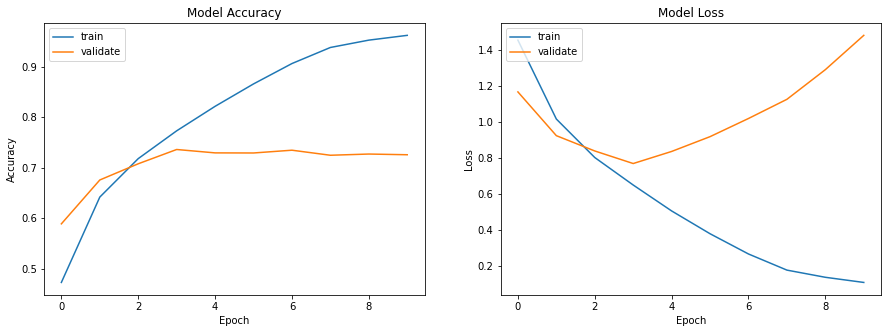

In [ ]:
plotmodelhistory(hist)

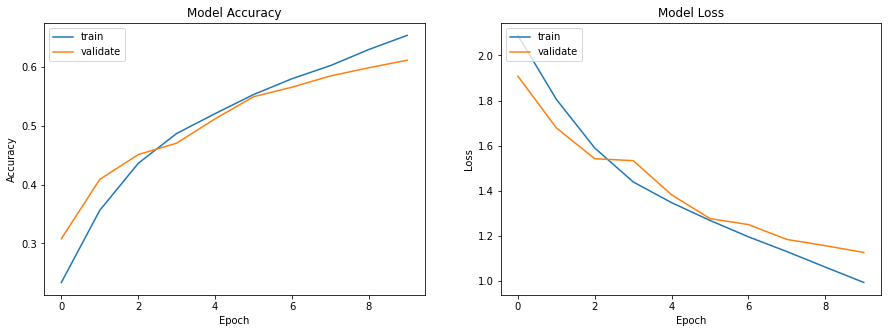

In [ ]:
plotmodelhistory(hist1)

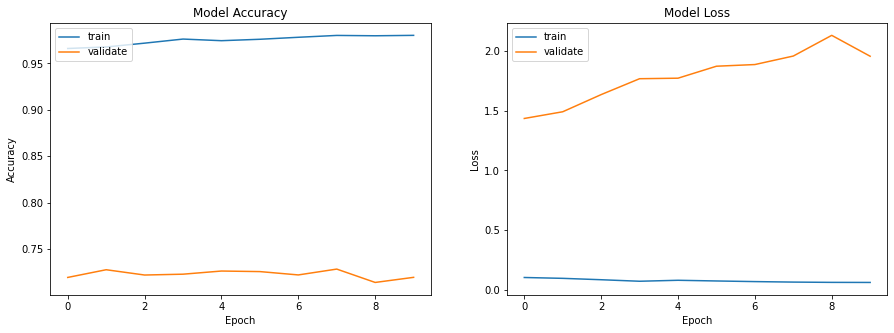

In [ ]:
plotmodelhistory(hist2)

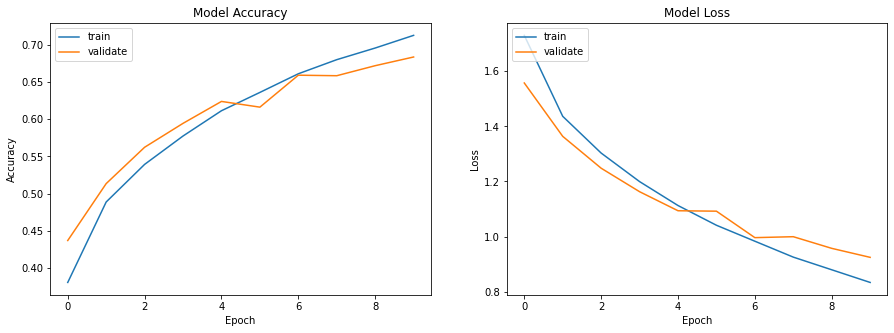

In [ ]:
plotmodelhistory(hist3)

In [ ]:
#define the convnet
model4 = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT
model4.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model4.add(Activation('relu'))
model4.add(Conv2D(32, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT
model4.add(Conv2D(64, (3, 3), padding='same'))
model4.add(Activation('relu'))
model4.add(Conv2D(64, (3, 3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT
model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
# a softmax classifier
model4.add(Dense(10))
model4.add(Activation('softmax'))

model4.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_66 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_67 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 15, 15, 64)      

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model using Adam
model4.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist4=model4.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 5s 6ms/step - loss: 1.8256 - accuracy: 0.3196 - val_loss: 1.2442 - val_accuracy: 0.5441
Epoch 2/10
800/800 [==============================] - 4s 6ms/step - loss: 1.2419 - accuracy: 0.5573 - val_loss: 1.0065 - val_accuracy: 0.6355
Epoch 3/10
800/800 [==============================] - 4s 6ms/step - loss: 1.0530 - accuracy: 0.6252 - val_loss: 0.9318 - val_accuracy: 0.6671
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 0.9446 - accuracy: 0.6661 - val_loss: 0.9109 - val_accuracy: 0.6794
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 0.8586 - accuracy: 0.6939 - val_loss: 0.8057 - val_accuracy: 0.7143
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 0.7857 - accuracy: 0.7195 - val_loss: 0.7229 - val_accuracy: 0.7490
Epoch 7/10
800/800 [==============================] - 4s 6ms/step - loss: 0.7354 - accuracy: 0.7399 - val_loss: 0.7092 - val_accuracy: 0.7510
Epoch 

In [ ]:
prediction_score = model4.evaluate(x_test, y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.6921793222427368, 0.7638999819755554]


In [ ]:
#define the convnet
model5 = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT=>Batch Normalization
model5.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model5.add(Activation('relu'))
model5.add(Conv2D(32, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT=>Batch Normalization
model5.add(Conv2D(64, (3, 3), padding='same'))
model5.add(Activation('relu'))
model5.add(Conv2D(64, (3, 3)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(BatchNormalization())
model5.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT=>Batch Normalization
model5.add(Flatten())
model5.add(Dense(512))
model5.add(Activation('relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
# a softmax classifier
model5.add(Dense(10))
model5.add(Activation('softmax'))

model5.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_72 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_73 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
dropout_12 (Dropout)         (None, 15, 15, 32)      

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model using Adam
model5.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist5=model5.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 6s 6ms/step - loss: 2.1371 - accuracy: 0.3549 - val_loss: 1.4022 - val_accuracy: 0.5278
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 1.1950 - accuracy: 0.5838 - val_loss: 1.0320 - val_accuracy: 0.6331
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 0.9592 - accuracy: 0.6617 - val_loss: 0.8795 - val_accuracy: 0.6945
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 0.8386 - accuracy: 0.7064 - val_loss: 0.7644 - val_accuracy: 0.7303
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 0.7605 - accuracy: 0.7343 - val_loss: 0.7365 - val_accuracy: 0.7412
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 0.6943 - accuracy: 0.7546 - val_loss: 0.7973 - val_accuracy: 0.7257
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 0.6550 - accuracy: 0.7697 - val_loss: 0.7115 - val_accuracy: 0.7583
Epoch 

In [ ]:
prediction_score = model5.evaluate(x_test, y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.890891969203949, 0.7092999815940857]


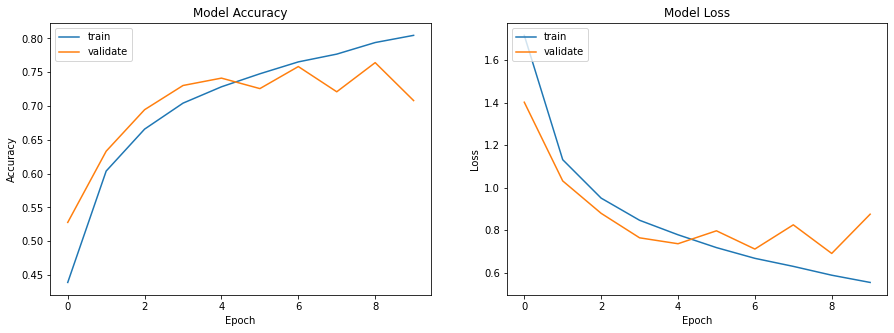

In [ ]:
plotmodelhistory(hist5)

In [ ]:
#define the convnet
model6 = Sequential()
# CONV => RELU => CONV => RELU => POOL => DROPOUT=>Batch Normalization
model6.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model6.add(Activation('selu'))
model6.add(Conv2D(32, (3, 3)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

# CONV => RELU => CONV => RELU => POOL => DROPOUT=>Batch Normalization
model6.add(Conv2D(64, (3, 3), padding='same'))
model6.add(Activation('selu'))
model6.add(Conv2D(64, (3, 3)))
model6.add(Activation('relu'))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(BatchNormalization())
model6.add(Dropout(0.25))

# FLATTERN => DENSE => RELU => DROPOUT=>Batch Normalization
model6.add(Flatten())
model6.add(Dense(512))
model6.add(Activation('selu'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
# a softmax classifier
model6.add(Dense(10))
model6.add(Activation('softmax'))

In [ ]:
# initiate Adam optimizer
opt = keras.optimizers.Adam(learning_rate=0.001)

# Let's train the model using Adam
model6.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
hist6=model6.fit(x_train,y_train,batch_size=50,epochs=10,validation_split=0.2,shuffle=True)

Epoch 1/10
800/800 [==============================] - 6s 7ms/step - loss: 2.0780 - accuracy: 0.3766 - val_loss: 1.3217 - val_accuracy: 0.5372
Epoch 2/10
800/800 [==============================] - 5s 6ms/step - loss: 1.1338 - accuracy: 0.6071 - val_loss: 0.9409 - val_accuracy: 0.6727
Epoch 3/10
800/800 [==============================] - 5s 6ms/step - loss: 0.9355 - accuracy: 0.6738 - val_loss: 0.8807 - val_accuracy: 0.6908
Epoch 4/10
800/800 [==============================] - 5s 6ms/step - loss: 0.8212 - accuracy: 0.7106 - val_loss: 0.7285 - val_accuracy: 0.7418
Epoch 5/10
800/800 [==============================] - 5s 6ms/step - loss: 0.7462 - accuracy: 0.7388 - val_loss: 0.7224 - val_accuracy: 0.7450
Epoch 6/10
800/800 [==============================] - 5s 6ms/step - loss: 0.6970 - accuracy: 0.7549 - val_loss: 0.6657 - val_accuracy: 0.7715
Epoch 7/10
800/800 [==============================] - 5s 6ms/step - loss: 0.6377 - accuracy: 0.7767 - val_loss: 0.7237 - val_accuracy: 0.7530
Epoch 

In [ ]:
prediction_score = model6.evaluate(x_test, y_test, verbose=0)
print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.6744081377983093, 0.7764000296592712]
